In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Metrics to evaluate the model
from sklearn.metrics import (
    f1_score,
    accuracy_score,   
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,

    classification_report,
    precision_recall_curve
)




In [179]:
df = pd.read_csv("../data/term-deposit-marketing-2020.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [181]:
df['default'].value_counts()

no     39191
yes      809
Name: default, dtype: int64

<AxesSubplot: xlabel='campaign', ylabel='y'>

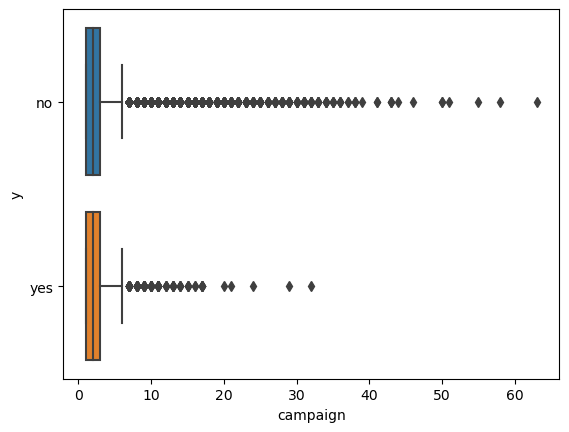

In [182]:
sns.boxplot(x = df['campaign'], y=df['y'])

In [183]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')

In [184]:
num_cols = df.select_dtypes(include="int64").columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [185]:
for cat in cat_cols:
    print(cat)
    print(df[cat].value_counts())
    print("******************************")

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64
******************************
marital
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64
******************************
education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64
******************************
default
no     39191
yes      809
Name: default, dtype: int64
******************************
housing
yes    24031
no     15969
Name: housing, dtype: int64
******************************
loan
no     33070
yes     6930
Name: loan, dtype: int64
******************************
contact
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64
******************************
month
may   

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\3859020170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


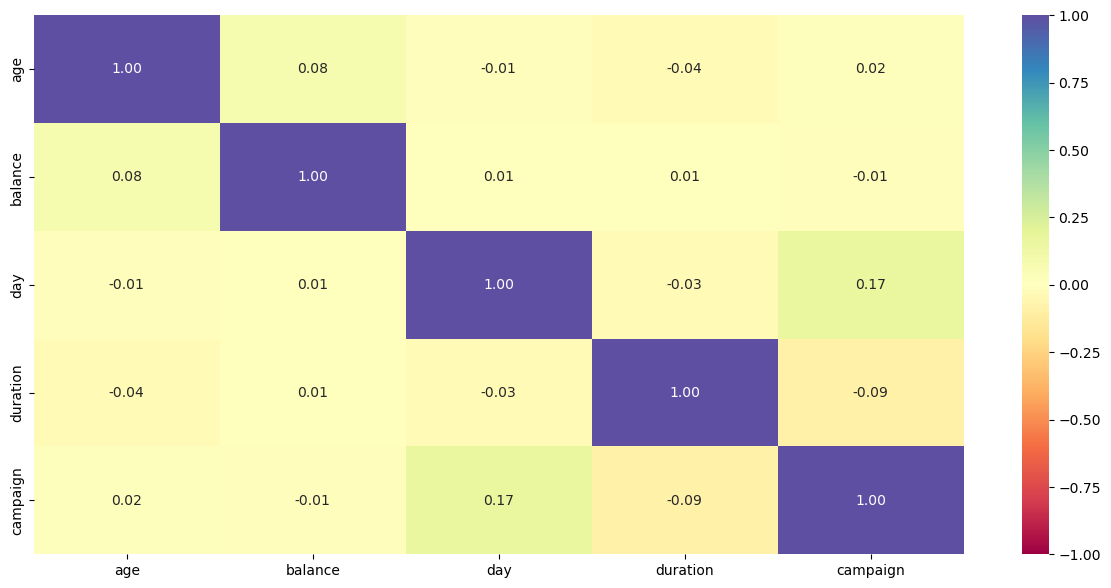

In [186]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [187]:
df[df['y'] == 'yes']["contact"].value_counts()

cellular     2233
unknown       497
telephone     166
Name: contact, dtype: int64

In [188]:
df[df['y'] == 'no']["contact"].value_counts()

cellular     22681
unknown      12268
telephone     2155
Name: contact, dtype: int64

In [189]:
for cat in cat_cols:
    print(cat)
    print(df[df['y'] == 'yes'][cat].value_counts())
    print("******************************")

job
management       676
blue-collar      535
technician       497
admin            351
services         238
retired          151
self-employed    112
unemployed        96
entrepreneur      88
student           82
housemaid         53
unknown           17
Name: job, dtype: int64
******************************
marital
married     1478
single      1027
divorced     391
Name: marital, dtype: int64
******************************
education
secondary    1418
tertiary     1029
primary       353
unknown        96
Name: education, dtype: int64
******************************
default
no     2847
yes      49
Name: default, dtype: int64
******************************
housing
yes    1464
no     1432
Name: housing, dtype: int64
******************************
loan
no     2516
yes     380
Name: loan, dtype: int64
******************************
contact
cellular     2233
unknown       497
telephone     166
Name: contact, dtype: int64
******************************
month
may    791
apr    451
jul    384
j

In [190]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


<AxesSubplot: xlabel='age'>

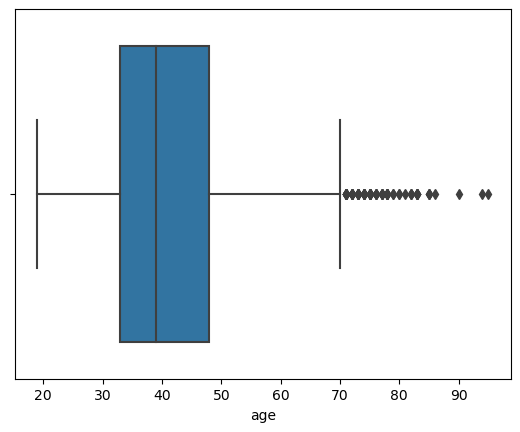

In [191]:
## lets keep the unknown values as first trial
sns.boxplot(x = df['age'])

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<AxesSubplot: xlabel='age', ylabel='Density'>

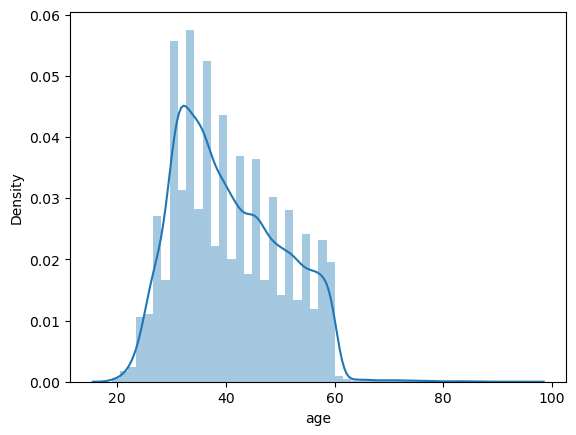

In [192]:
sns.distplot(df["age"])

<AxesSubplot: xlabel='balance', ylabel='y'>

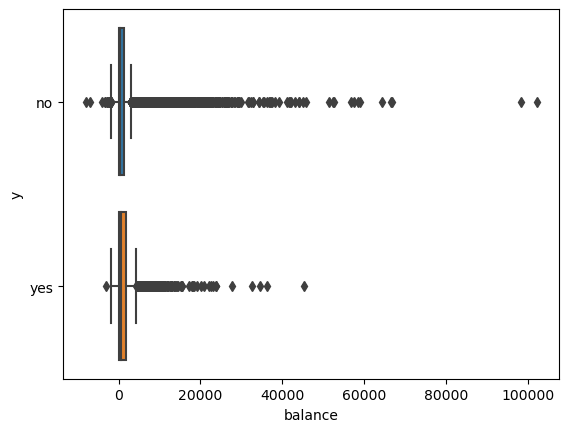

In [193]:
sns.boxplot(data =df, x = 'balance', y='y')

In [194]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\902392605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["balance"])


<AxesSubplot: xlabel='balance', ylabel='Density'>

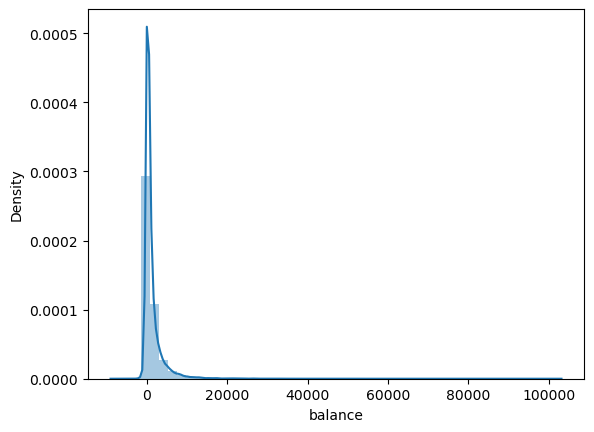

In [195]:
sns.distplot(df["balance"])

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\4239709261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["duration"])


<AxesSubplot: xlabel='duration', ylabel='Density'>

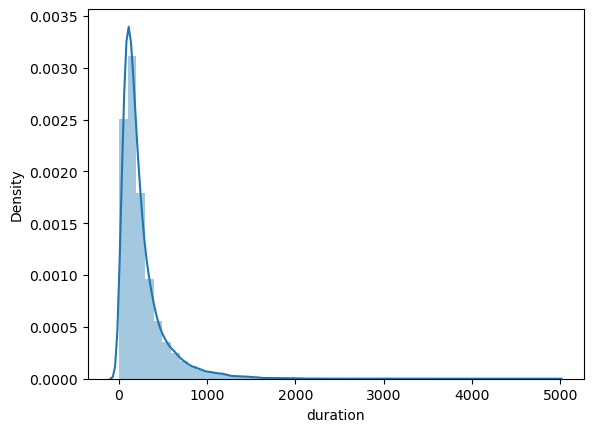

In [196]:
sns.distplot(df["duration"])

In [197]:
df.groupby(by=["y"])['duration'].mean()

y
no     221.408042
yes    682.958564
Name: duration, dtype: float64

<AxesSubplot: xlabel='duration', ylabel='y'>

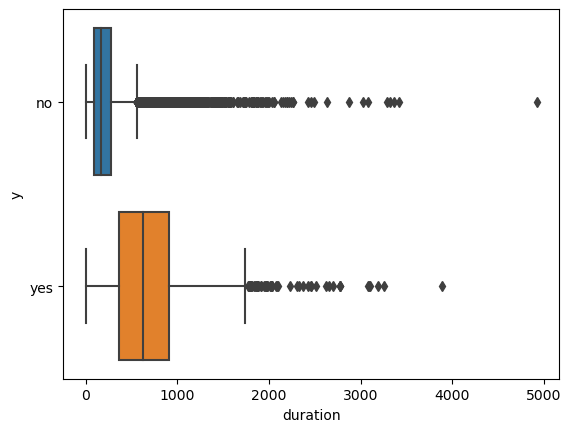

In [198]:
sns.boxplot(x = df['duration'], y =df["y"])

In [199]:
df2 = df.copy()

In [200]:
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [201]:
# lets use label encoder
def enc(df):
    cat_cols = df.select_dtypes(include="object").columns
    le = LabelEncoder()
    for  cat in cat_cols:
        le.fit(df[cat]) 
        keys = le.classes_
        values = le.transform(keys)
        my_dict = dict(zip(keys, values))
        df[cat] = df[cat].replace(my_dict)
        
    return df

In [202]:
df = enc(df)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,9,1,2,0,395,0,0,0,3,6,107,1,0
39996,30,4,2,2,0,3340,0,0,0,3,6,238,3,1
39997,54,0,0,1,0,200,0,0,0,3,6,170,1,1
39998,34,4,1,2,0,1047,0,0,0,3,6,342,1,0


In [203]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [204]:
from scipy.stats import shapiro

stat, p = shapiro(df)

C:\Users\abdullahq.MOLG0\Anaconda3\envs\env2\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [205]:
p

0.0

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int32
 2   marital    40000 non-null  int32
 3   education  40000 non-null  int32
 4   default    40000 non-null  int32
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int32
 7   loan       40000 non-null  int32
 8   contact    40000 non-null  int32
 9   day        40000 non-null  int64
 10  month      40000 non-null  int32
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.9 MB


In [207]:
df['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [208]:
from scipy import stats

# calculate the z-score of each column
z = np.abs(stats.zscore(df))

# drop the rows that have a z-score greater than 3 for only class '0'
df = df[(z < 3).all(axis=1) | (df['y'] != 0)]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,9,1,2,0,395,0,0,0,3,6,107,1,0
39996,30,4,2,2,0,3340,0,0,0,3,6,238,3,1
39997,54,0,0,1,0,200,0,0,0,3,6,170,1,1
39998,34,4,1,2,0,1047,0,0,0,3,6,342,1,0


In [209]:
Y = df["y"]
X= df.drop(['y'], axis=1)

In [210]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37482 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        37482 non-null  int64
 1   job        37482 non-null  int32
 2   marital    37482 non-null  int32
 3   education  37482 non-null  int32
 4   default    37482 non-null  int32
 5   balance    37482 non-null  int64
 6   housing    37482 non-null  int32
 7   loan       37482 non-null  int32
 8   contact    37482 non-null  int32
 9   day        37482 non-null  int64
 10  month      37482 non-null  int32
 11  duration   37482 non-null  int64
 12  campaign   37482 non-null  int64
dtypes: int32(8), int64(5)
memory usage: 2.9 MB


In [211]:
X.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
count,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000
mean,40.489888,4.260925,1.153861,1.194413,0.001307,1050.873966,0.605784,0.171149,0.693586,15.878395,5.523131,249.308708,2.543514
std,9.571197,3.299830,0.606425,0.740031,0.036133,1767.490260,0.488688,0.376644,0.921564,8.237950,2.913443,236.964054,2.035159
min,19.000000,0.000000,0.000000,0.000000,0.000000,-4057.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,62.000000,0.000000,0.000000,0.000000,8.000000,3.000000,102.000000,1.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,410.000000,1.000000,0.000000,0.000000,16.000000,6.000000,176.000000,2.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1278.000000,1.000000,0.000000,2.000000,21.000000,8.000000,312.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,45248.000000,1.000000,1.000000,2.000000,31.000000,10.000000,3881.000000,32.000000


In [212]:
##Lets split the data into tran test set befor starting the process of over sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=12)


In [213]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
7964,39,1,1,1,0,280,1,0,2,2,6,147,3
5325,44,1,2,3,0,0,1,0,2,23,8,354,4
12451,39,1,1,1,0,971,1,1,2,1,5,471,3
31021,59,1,1,0,0,1723,0,0,0,10,3,39,3
6244,46,9,0,1,0,119,1,0,2,27,8,106,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21345,45,9,1,1,0,1629,0,0,0,18,1,58,4
36236,36,2,1,1,0,0,1,0,0,11,8,187,1
15706,33,9,1,2,0,75,0,0,0,21,5,204,4
32169,19,8,2,1,0,626,0,0,1,15,0,117,1


In [214]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [215]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31859 entries, 7964 to 23573
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        31859 non-null  int64
 1   job        31859 non-null  int32
 2   marital    31859 non-null  int32
 3   education  31859 non-null  int32
 4   default    31859 non-null  int32
 5   balance    31859 non-null  int64
 6   housing    31859 non-null  int32
 7   loan       31859 non-null  int32
 8   contact    31859 non-null  int32
 9   day        31859 non-null  int64
 10  month      31859 non-null  int32
 11  duration   31859 non-null  int64
 12  campaign   31859 non-null  int64
dtypes: int32(8), int64(5)
memory usage: 2.4 MB


In [216]:
#Random Forest

n_estimators = [75, 100, 125]
criterion=['entropy']
min_samples_split = [11, 12, 14]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train,Y_train)



In [217]:
grid_search_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_split': 11,
 'n_estimators': 75}

In [218]:
grid_search_rf.best_score_

0.6146406561594923

In [219]:
grid_search_rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5189
           1       0.59      0.69      0.64       434

    accuracy                           0.94      5623
   macro avg       0.78      0.83      0.80      5623
weighted avg       0.94      0.94      0.94      5623



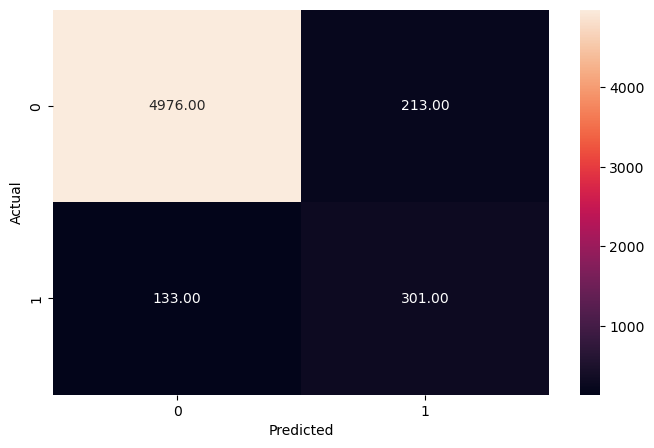

In [220]:
prd_test_rf = grid_search_rf.predict(X_test)
metrics_score(Y_test, prd_test_rf)

In [221]:
roc_auc_score(Y_test, prd_test_rf)

0.8262500077707807

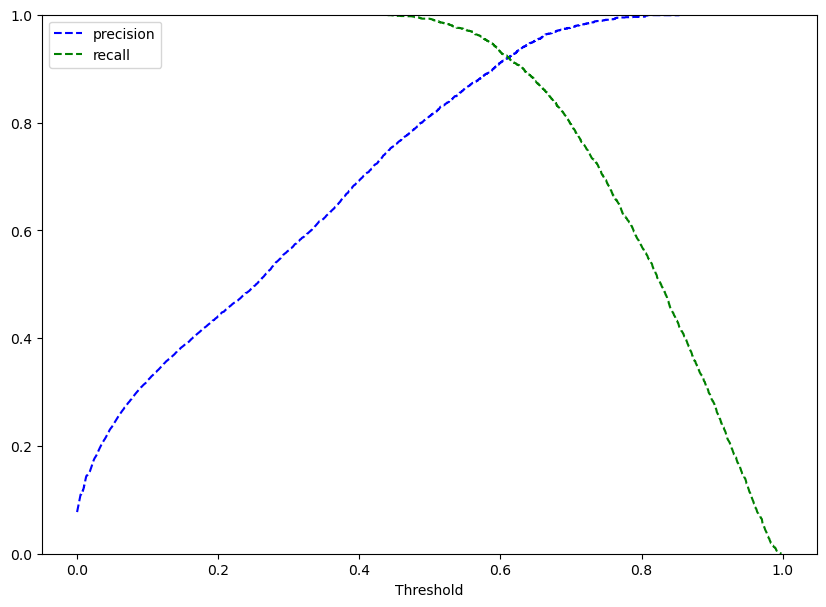

In [222]:
y_scores_rf=grid_search_rf.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(Y_train, y_scores_rf[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_rf, precisions_rf[:-1], 'b--', label='precision')
plt.plot(thresholds_rf, recalls_rf[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [223]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_rf)):
    if precisions_rf[i]==recalls_rf[i]:
        print(thresholds_rf[i])

0.6111919485636247


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5189
           1       0.65      0.54      0.59       434

    accuracy                           0.94      5623
   macro avg       0.80      0.76      0.78      5623
weighted avg       0.94      0.94      0.94      5623



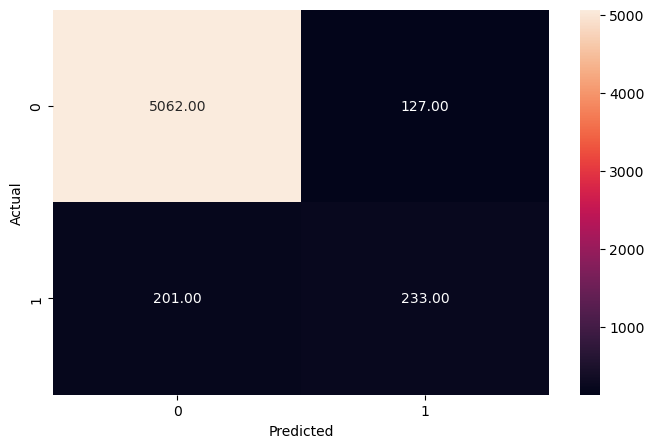

In [224]:
optimal_threshold1 = 0.62
y_pred_test = grid_search_rf.predict_proba(X_test)
metrics_score(Y_test, y_pred_test[:,1]>optimal_threshold1)

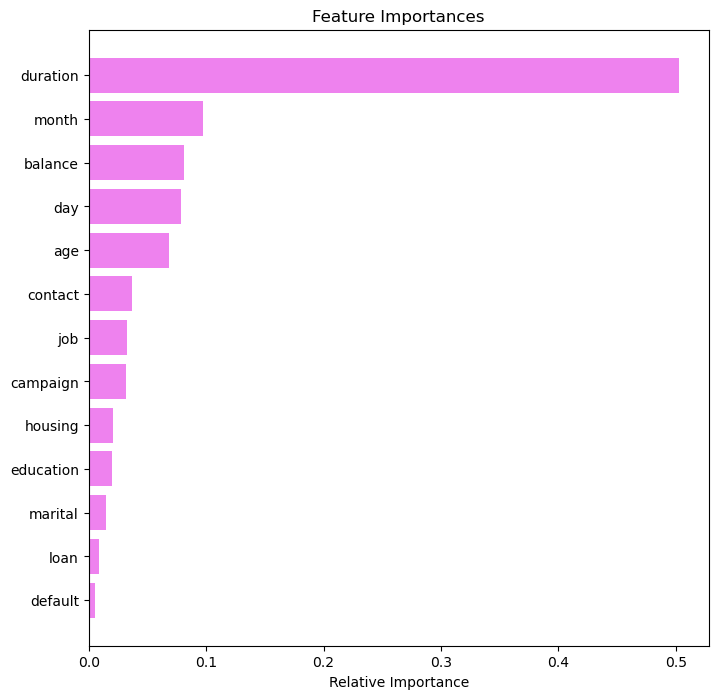

In [225]:
# importance of features in the tree building

feature_names = list(X.columns)
importances = grid_search_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [226]:
xgb = XGBClassifier()

In [227]:

xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5189
           1       0.70      0.56      0.63       434

    accuracy                           0.95      5623
   macro avg       0.83      0.77      0.80      5623
weighted avg       0.94      0.95      0.95      5623



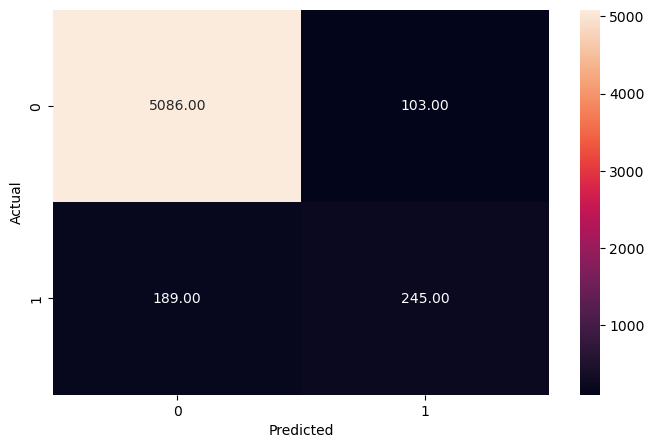

In [228]:

prd_test_xgb = xgb.predict(X_test)
metrics_score(Y_test, prd_test_xgb)

In [229]:
roc_auc_score(Y_test, prd_test_xgb)

0.7723332235063005

In [230]:
##Logistic Regression
lg = LogisticRegression(class_weight="balanced")
lg.fit(X_train, Y_train)

C:\Users\abdullahq.MOLG0\Anaconda3\envs\env2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5189
           1       0.29      0.80      0.42       434

    accuracy                           0.83      5623
   macro avg       0.63      0.82      0.66      5623
weighted avg       0.93      0.83      0.86      5623



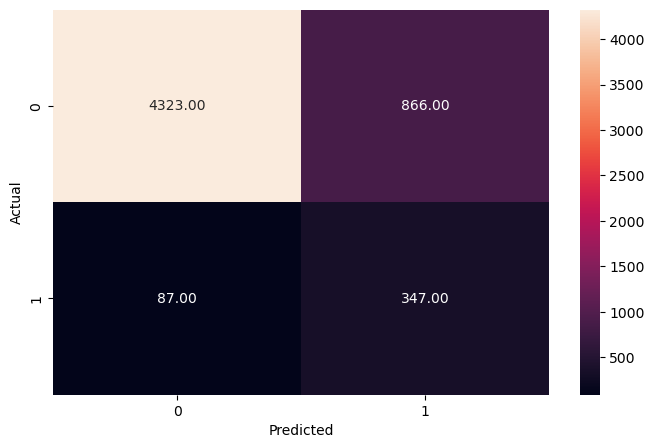

In [231]:
prd_test_lg = lg.predict(X_test)
metrics_score(Y_test, prd_test_lg)

In [232]:
roc_auc_score(Y_test, prd_test_lg)

0.8163238346271312

In [233]:
#printing the coefficients of logistic regression
cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
education,0.050826
default,0.012173
duration,0.006472
job,0.000199
balance,0.000149
day,-0.021335
age,-0.022731
marital,-0.074965
loan,-0.076662
month,-0.077323


In [234]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
education,1.052139
default,1.012248
duration,1.006493
job,1.000199
balance,1.000149
day,0.978891
age,0.977525
marital,0.927776
loan,0.926203
month,0.925591


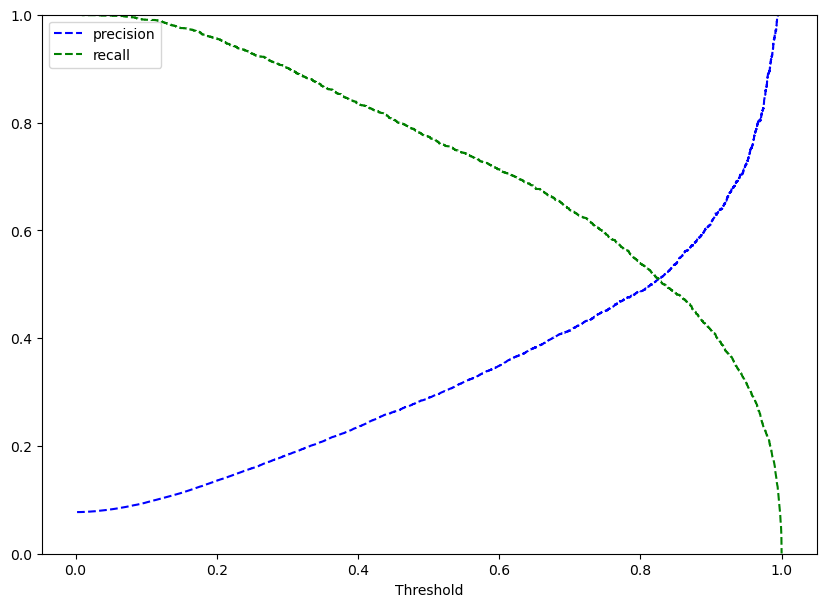

In [235]:
y_scores_lg=lg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [236]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.8255853991461992


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5189
           1       0.55      0.58      0.56       434

    accuracy                           0.93      5623
   macro avg       0.76      0.77      0.76      5623
weighted avg       0.93      0.93      0.93      5623



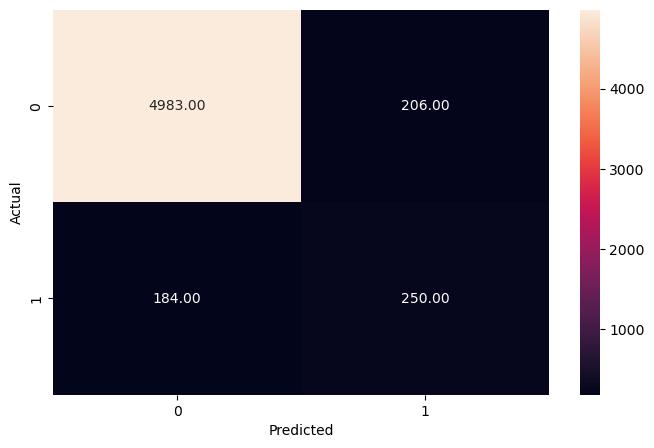

In [237]:
optimal_threshold1=.82
y_pred_test = lg.predict_proba(X_test)
metrics_score(Y_test, y_pred_test[:,1]>optimal_threshold1)

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ints = ['age', 'balance', 'duration', 'day']
ct = ColumnTransformer([
        ('somename', StandardScaler(), ints)
    ], remainder='passthrough')

X_train_stan = ct.fit_transform(X_train)
X_test_stan = ct.fit_transform(X_test)

In [239]:
#fitting SVM
svm = SVC(class_weight="balanced") #linear kernal or linear decision boundary
model = svm.fit(X = X_train_stan, y = Y_train)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5189
           1       0.36      0.88      0.51       434

    accuracy                           0.87      5623
   macro avg       0.67      0.87      0.72      5623
weighted avg       0.94      0.87      0.89      5623



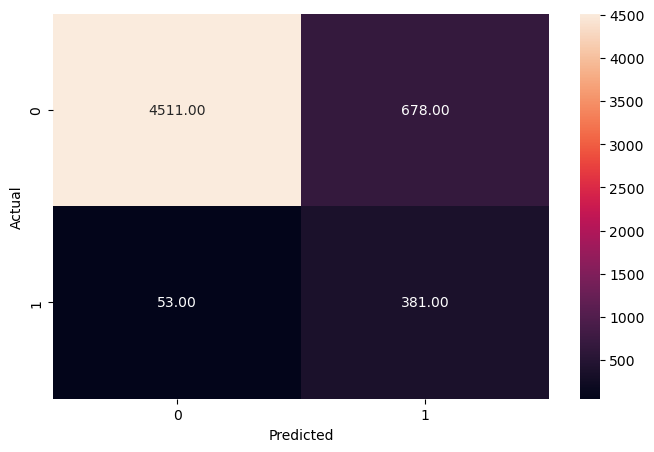

In [240]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_svm)

In [241]:
roc_auc_score(Y_test, y_pred_test_svm)

0.8736095853245034

In [242]:
##Decision Tree Classifier
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, X = X_train_stan, y = Y_train, cv=5, n_jobs=-1)
scores_dt

array([0.92341494, 0.92561205, 0.92639674, 0.92310107, 0.91994977])

In [243]:
scores_dt.mean()

0.9236949136777277

In [244]:
dt.fit(X = X_train_stan, y = Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5189
           1       0.55      0.57      0.56       434

    accuracy                           0.93      5623
   macro avg       0.75      0.76      0.76      5623
weighted avg       0.93      0.93      0.93      5623



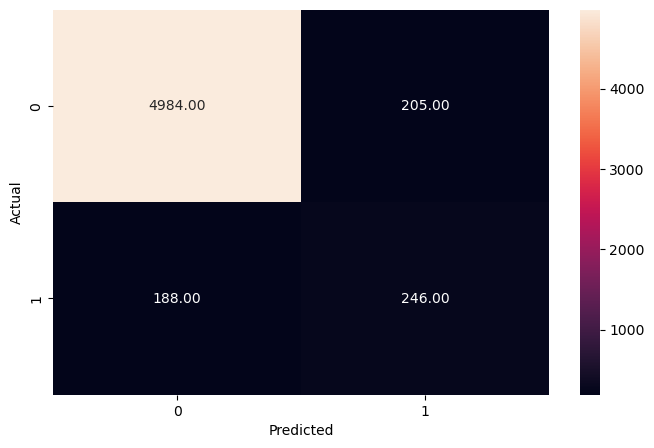

In [245]:
# Checking performance on the test data
y_pred_test_dt = dt.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_dt)

In [246]:
roc_auc_score(Y_test, y_pred_test_dt)

0.763656813908898

In [247]:
##Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(estimator=dt, n_estimators=100, replacement=False, sampling_strategy='auto', n_jobs=-1)
bbc.fit(X = X_train_stan, y = Y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                          n_jobs=-1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      5189
           1       0.43      0.92      0.58       434

    accuracy                           0.90      5623
   macro avg       0.71      0.91      0.76      5623
weighted avg       0.95      0.90      0.91      5623



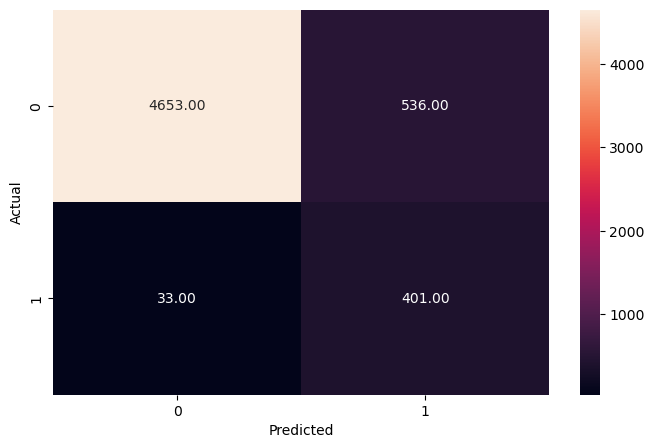

In [248]:
y_pred_test_bbc = bbc.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_bbc)

In [249]:
roc_auc_score(Y_test, y_pred_test_bbc)

0.9103338504972855

In [250]:
#Random Forest.

n_estimators = [250, 275, 300]
criterion=['entropy']
min_samples_split = [ 19, 20, 21]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X = X_train_stan, y = Y_train)

In [251]:
grid_search_rf.best_score_

0.9268965040211338

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5189
           1       0.55      0.80      0.65       434

    accuracy                           0.93      5623
   macro avg       0.77      0.87      0.81      5623
weighted avg       0.95      0.93      0.94      5623



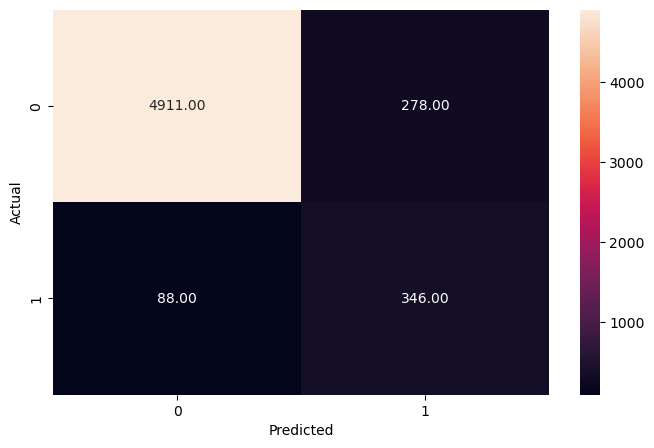

In [252]:
prd_test_rf2 = grid_search_rf.predict(X_test_stan)
metrics_score(Y_test, prd_test_rf2)

In [253]:
roc_auc_score(Y_test, prd_test_rf2)

0.8718300765621712

In [254]:
## Logistc Regression
lg = LogisticRegression(class_weight="balanced")
lg.fit(X = X_train_stan, y = Y_train)

LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      5189
           1       0.33      0.81      0.47       434

    accuracy                           0.86      5623
   macro avg       0.66      0.84      0.69      5623
weighted avg       0.93      0.86      0.88      5623



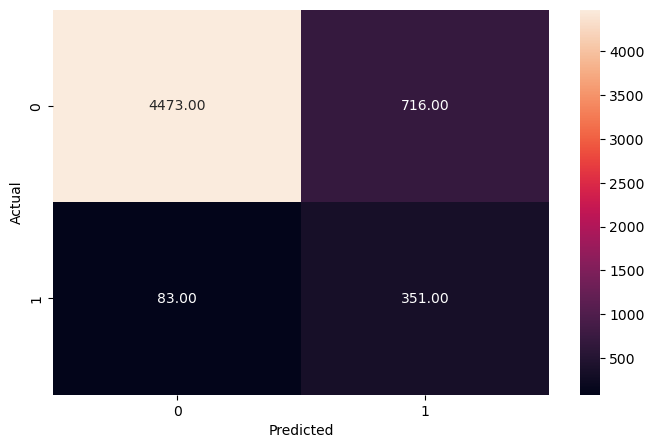

In [255]:
y_pred_test_lg2 = lg.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_lg2)

In [256]:
roc_auc_score(Y_test, y_pred_test_lg2)

0.8353857815140678

In [257]:
##Decision Tree Classifier
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, X = X_train_stan, y = Y_train, cv=5, n_jobs=-1)
scores_dt

array([0.92341494, 0.92341494, 0.92639674, 0.92404269, 0.91571182])

In [258]:
scores_dt.mean()

0.9225962244764337

In [259]:
dt.fit(X = X_train_stan, y = Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5189
           1       0.54      0.54      0.54       434

    accuracy                           0.93      5623
   macro avg       0.75      0.75      0.75      5623
weighted avg       0.93      0.93      0.93      5623



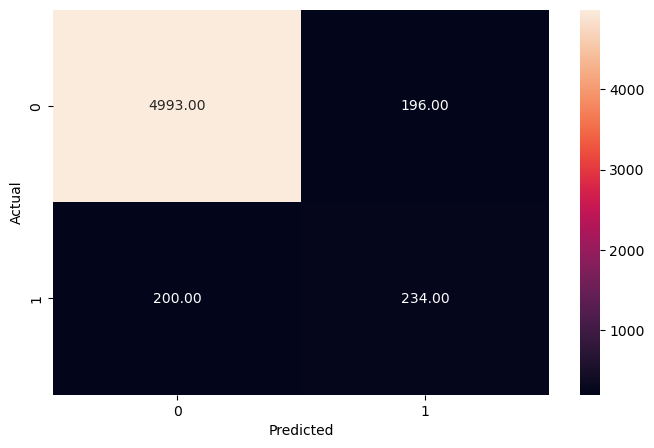

In [260]:
y_pred_test_dt2 = dt.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_dt2)

In [261]:
roc_auc_score(Y_test, y_pred_test_dt2)

0.7506991482336349

In [262]:
##Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(estimator=dt, n_estimators=200, replacement=False, n_jobs=-1)
bbc.fit(X = X_train_stan, y = Y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                          n_jobs=-1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      5189
           1       0.43      0.92      0.59       434

    accuracy                           0.90      5623
   macro avg       0.71      0.91      0.76      5623
weighted avg       0.95      0.90      0.92      5623



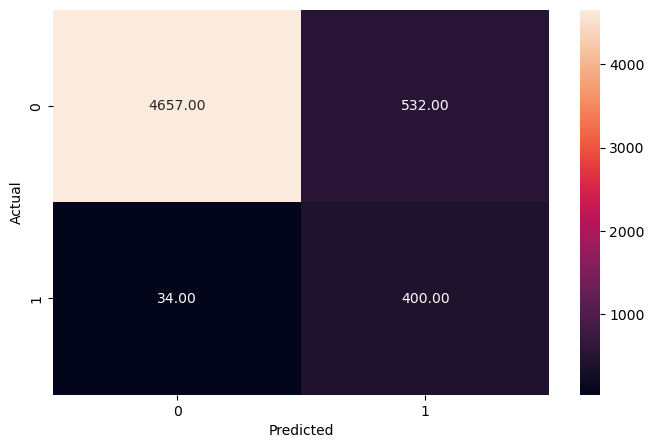

In [263]:
y_pred_test_bbc2 = bbc.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_bbc2)

In [264]:
roc_auc_score(Y_test, y_pred_test_bbc2)

0.9095672074833949

In [265]:
##XGBoost
xgb.fit(X = X_train_stan, y = Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5189
           1       0.72      0.52      0.60       434

    accuracy                           0.95      5623
   macro avg       0.84      0.75      0.79      5623
weighted avg       0.94      0.95      0.94      5623



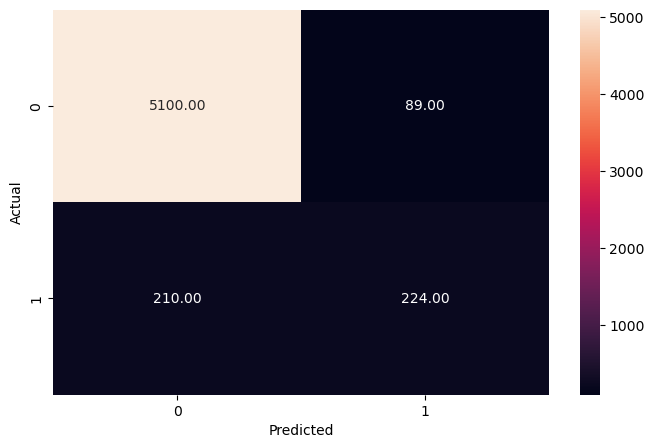

In [266]:
prd_test_xgb2 = xgb.predict(X_test_stan)
metrics_score(Y_test, prd_test_xgb2)

In [267]:
roc_auc_score(Y_test, prd_test_xgb2)

0.7494886826351028

# lets now make Second trial, lets drop all unknowns in class 1 and fill class 0 with mode within the class

In [268]:
df = pd.read_csv("../data/term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [269]:
df['default'].value_counts()

no     39191
yes      809
Name: default, dtype: int64

In [270]:
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [271]:
df.groupby(['y', 'default']).count()

age    job  marital  education  balance  housing   loan  \
y   default                                                              
no  no       36344  36344    36344      36344    36344    36344  36344   
    yes        760    760      760        760      760      760    760   
yes no        2847   2847     2847       2847     2847     2847   2847   
    yes         49     49       49         49       49       49     49   

             contact    day  month  duration  campaign  
y   default                                             
no  no         36344  36344  36344     36344     36344  
    yes          760    760    760       760       760  
yes no          2847   2847   2847      2847      2847  
    yes           49     49     49        49        49

In [272]:
df.replace('unknown', np.nan, inplace=True)

In [273]:
df2 = df[(df['y'] == 'no') & (df['default'] == 'no')]
df2.dropna(inplace=True)


C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\2411754612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [274]:
df3 = df[(df['y'] == 'yes')& (df['default'] == 'no')]
df3.fillna(df3.mode().iloc[0], inplace=True)

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\1945678405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(df3.mode().iloc[0], inplace=True)


In [275]:
df4 = df[df['default'] == 'yes']
df4.fillna(df4.mode().iloc[0], inplace=True)

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\2090673308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.fillna(df4.mode().iloc[0], inplace=True)


In [276]:
df5 = pd.concat([df2, df3, df4], axis=0)
df5['default'].value_counts()

no     26351
yes      809
Name: default, dtype: int64

In [277]:
df5.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [278]:
df6 =df5.copy()

In [279]:
df5 = enc(df5)
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,0
12660,31,9,2,1,0,19,0,0,1,4,5,65,2,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38985,38,2,2,2,1,-38,1,0,0,18,8,119,4,0
39290,32,0,0,1,1,5,1,1,0,18,8,82,3,0
39347,24,7,2,1,1,-1414,1,1,0,18,8,171,2,0
39397,59,4,0,2,1,0,0,0,0,22,8,239,1,0


In [280]:
## Lets apply outlier detection using 3 Z scores
from scipy import stats

# calculate the z-score of each column
z = np.abs(stats.zscore(df5))

# drop the rows that have a z-score greater than 3 for only class '0'
df5 = df5[(z < 3).all(axis=1) | (df5['y'] != 0)]
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,0
12664,29,1,2,0,0,343,0,0,0,4,5,39,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33335,45,1,1,0,1,-443,1,1,0,20,0,691,1,1
34768,39,9,0,2,1,3,0,0,0,6,8,488,1,1
35559,45,0,1,1,1,-106,1,1,0,7,8,553,3,1
37710,26,0,2,1,1,-930,1,0,0,14,8,786,1,1


In [281]:
Y = df5['y']
X = df5.drop(['y'], axis=1)


In [282]:
##Lets split the data into tran test set befor starting the process of over sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=12)


In [283]:
ints = ['age', 'balance', 'duration', 'day']
ct = ColumnTransformer([
        ('somename', StandardScaler(), ints)
    ], remainder='passthrough')

X_train_stan = ct.fit_transform(X_train)
X_test_stan = ct.fit_transform(X_test)

In [284]:
## random forest
#Random Forest

n_estimators = [100, 125, 150]
criterion=['entropy']
min_samples_split = [11, 12, 13, 14]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train_stan,Y_train)


In [285]:
grid_search_rf.best_score_


0.7045092975184163

In [286]:
grid_search_rf.best_params_


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_split': 12,
 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3086
           1       0.70      0.76      0.73       434

    accuracy                           0.93      3520
   macro avg       0.83      0.86      0.84      3520
weighted avg       0.93      0.93      0.93      3520



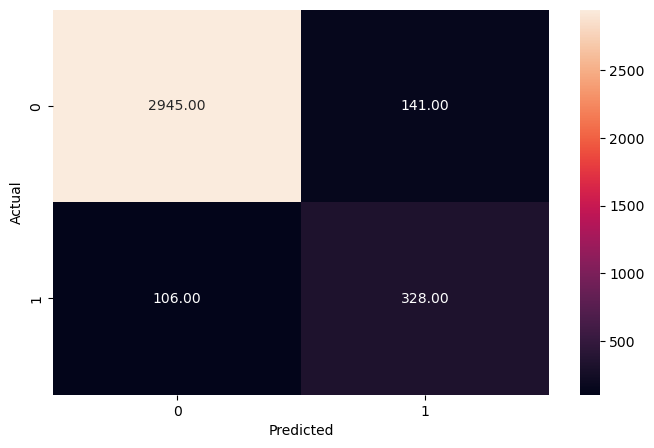

In [287]:
prd_test_rf = grid_search_rf.predict(X_test_stan)
metrics_score(Y_test, prd_test_rf)

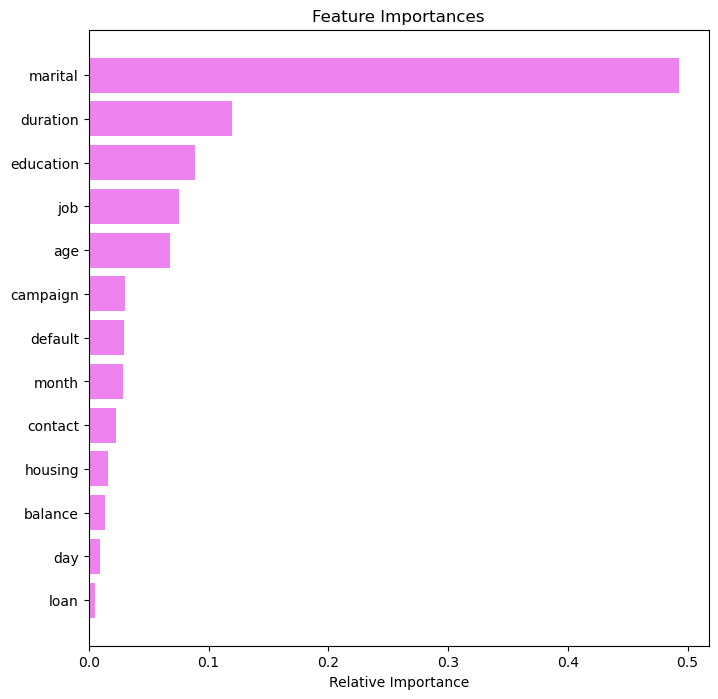

In [288]:
# importance of features in the tree building

feature_names = list(X.columns)
importances = grid_search_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [289]:
####cluster centriods sampling
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
estimator = MiniBatchKMeans(n_clusters=5)
cc = ClusterCentroids(sampling_strategy='auto', estimator=estimator)

In [290]:
X_res, y_res = cc.fit_resample(X_train_stan, Y_train)

C:\Users\abdullahq.MOLG0\Anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [291]:
## random forest
#Random Forest

n_estimators = [50, 75, 100, 125]
criterion=['entropy']
min_samples_split = [11, 12, 13]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_res,y_res)


              precision    recall  f1-score   support

           0       0.99      0.65      0.79      3086
           1       0.28      0.97      0.44       434

    accuracy                           0.69      3520
   macro avg       0.64      0.81      0.61      3520
weighted avg       0.91      0.69      0.75      3520



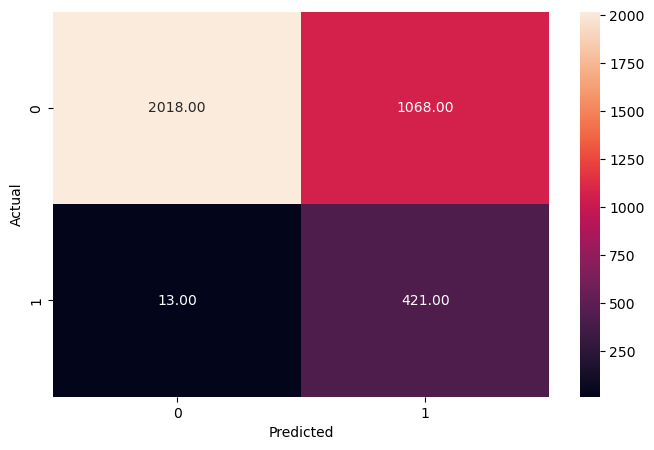

In [292]:
prd_test_rf = grid_search_rf.predict(X_test_stan)
metrics_score(Y_test, prd_test_rf)


In [293]:
##Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(estimator=rf, n_estimators=200, replacement=False, n_jobs=-1)
bbc.fit(X_res,y_res)

BalancedBaggingClassifier(estimator=RandomForestClassifier(), n_estimators=200,
                          n_jobs=-1)

              precision    recall  f1-score   support

           0       0.99      0.66      0.80      3086
           1       0.29      0.97      0.45       434

    accuracy                           0.70      3520
   macro avg       0.64      0.82      0.62      3520
weighted avg       0.91      0.70      0.75      3520



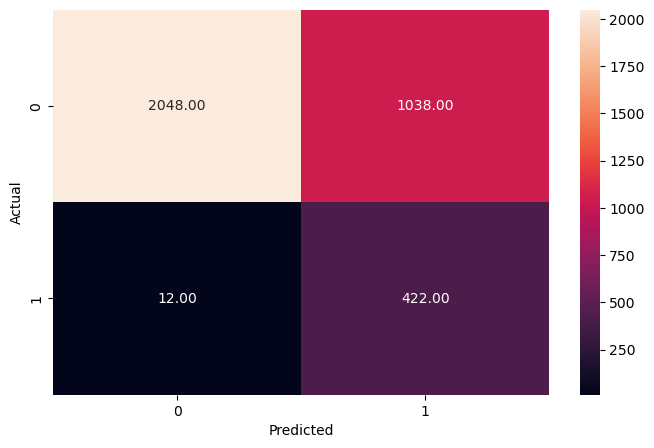

In [294]:
y_pred_test_bbc2 = bbc.predict(X_test_stan)
metrics_score(Y_test, y_pred_test_bbc2)

In [295]:
xgb = XGBClassifier()
xgb.fit(X_res,y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      3086
           1       0.32      0.96      0.47       434

    accuracy                           0.74      3520
   macro avg       0.65      0.83      0.65      3520
weighted avg       0.91      0.74      0.78      3520



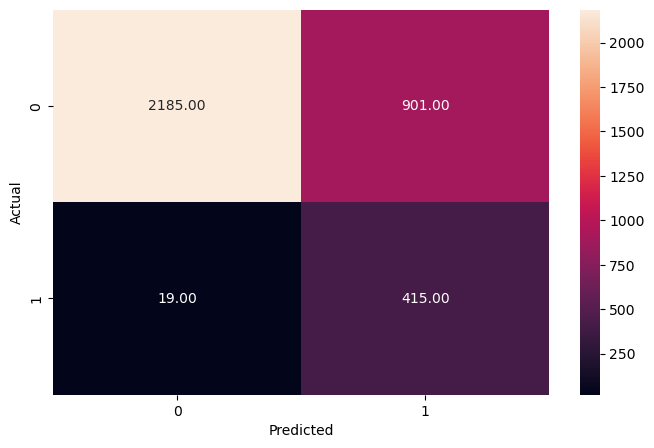

In [296]:
prd_test_xgb = xgb.predict(X_test_stan)
metrics_score(Y_test, prd_test_xgb)

# lets try to cluster my data then fill missing values based on the cluster 


In [299]:
df= pd.read_csv('../data/term-deposit-marketing-2020.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [300]:
df2 = df.copy()

In [301]:
df = df.drop(['job', 'education', 'contact', 'day', 'month'], axis=1)
Y = df['y']

In [302]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [303]:
df = enc(df)
df

,age,marital,default,balance,housing,loan,duration,campaign,y
0,58,1,0,2143,1,0,261,1,0
1,44,2,0,29,1,0,151,1,0
2,33,1,0,2,1,1,76,1,0
3,47,1,0,1506,1,0,92,1,0
4,33,2,0,1,0,0,198,1,0
...,...,...,...,...,...,...,...,...,...
39995,53,1,0,395,0,0,107,1,0
39996,30,2,0,3340,0,0,238,3,1
39997,54,0,0,200,0,0,170,1,1
39998,34,1,0,1047,0,0,342,1,0


In [304]:
X = df.drop(['y'], axis=1)
Y = df['y']

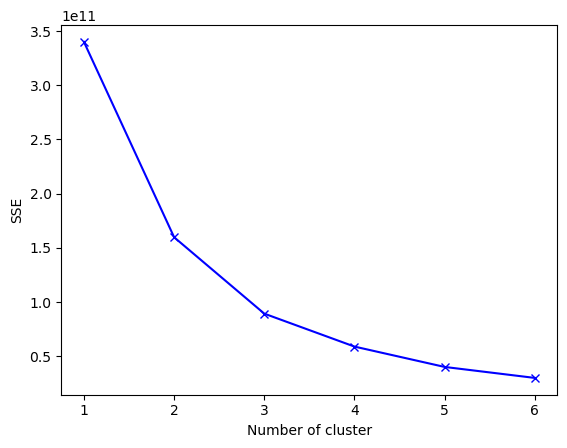

In [305]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    sse[k] = kmeans.inertia_ 

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

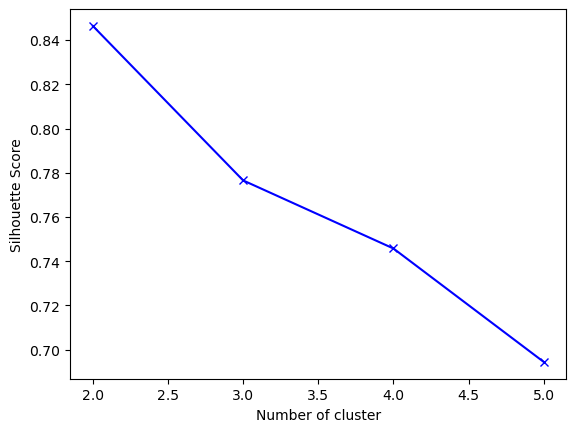

In [306]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans.predict(X)
    sc[k] = silhouette_score(X, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [307]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)

#Adding predicted labels to the original data and scaled data 
df['KMeans_Labels'] = kmeans.predict(X)


In [308]:
df[df['y'] == 1]['KMeans_Labels'].sum()

147

In [309]:
df['KMeans_Labels'].sum()

1677

In [310]:
df['job'] = df2['job']
df['education'] = df2['education']
df['contact'] = df2['contact']
df

,age,marital,default,balance,housing,loan,duration,campaign,y,KMeans_Labels,job,education,contact
0,58,1,0,2143,1,0,261,1,0,0,management,tertiary,unknown
1,44,2,0,29,1,0,151,1,0,0,technician,secondary,unknown
2,33,1,0,2,1,1,76,1,0,0,entrepreneur,secondary,unknown
3,47,1,0,1506,1,0,92,1,0,0,blue-collar,unknown,unknown
4,33,2,0,1,0,0,198,1,0,0,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,1,0,395,0,0,107,1,0,0,technician,tertiary,cellular
39996,30,2,0,3340,0,0,238,3,1,0,management,tertiary,cellular
39997,54,0,0,200,0,0,170,1,1,0,admin,secondary,cellular
39998,34,1,0,1047,0,0,342,1,0,0,management,tertiary,cellular


In [311]:
df.replace('unknown', np.nan, inplace=True)
df

,age,marital,default,balance,housing,loan,duration,campaign,y,KMeans_Labels,job,education,contact
0,58,1,0,2143,1,0,261,1,0,0,management,tertiary,NaN
1,44,2,0,29,1,0,151,1,0,0,technician,secondary,NaN
2,33,1,0,2,1,1,76,1,0,0,entrepreneur,secondary,NaN
3,47,1,0,1506,1,0,92,1,0,0,blue-collar,NaN,NaN
4,33,2,0,1,0,0,198,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,1,0,395,0,0,107,1,0,0,technician,tertiary,cellular
39996,30,2,0,3340,0,0,238,3,1,0,management,tertiary,cellular
39997,54,0,0,200,0,0,170,1,1,0,admin,secondary,cellular
39998,34,1,0,1047,0,0,342,1,0,0,management,tertiary,cellular


In [312]:
df2 = df[df['KMeans_Labels'] == 0]
df2.isnull().sum()

age                  0
marital              0
default              0
balance              0
housing              0
loan                 0
duration             0
campaign             0
y                    0
KMeans_Labels        0
job                223
education         1453
contact          12287
dtype: int64

In [313]:
df3 = df[df['KMeans_Labels']==1 ]
df3.isnull().sum()

age                0
marital            0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
y                  0
KMeans_Labels      0
job               12
education         78
contact          478
dtype: int64

In [314]:
df2.fillna(df2.mode().iloc[0], inplace=True)
df2.isnull().sum()

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\205753551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(df2.mode().iloc[0], inplace=True)


age              0
marital          0
default          0
balance          0
housing          0
loan             0
duration         0
campaign         0
y                0
KMeans_Labels    0
job              0
education        0
contact          0
dtype: int64

In [315]:
df3.fillna(df3.mode().iloc[0], inplace=True)
df3.isnull().sum()

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_7868\3705571770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(df3.mode().iloc[0], inplace=True)


age              0
marital          0
default          0
balance          0
housing          0
loan             0
duration         0
campaign         0
y                0
KMeans_Labels    0
job              0
education        0
contact          0
dtype: int64

In [316]:
df4 = pd.concat([df2, df3], axis=0)
df4

,age,marital,default,balance,housing,loan,duration,campaign,y,KMeans_Labels,job,education,contact
0,58,1,0,2143,1,0,261,1,0,0,management,tertiary,cellular
1,44,2,0,29,1,0,151,1,0,0,technician,secondary,cellular
2,33,1,0,2,1,1,76,1,0,0,entrepreneur,secondary,cellular
3,47,1,0,1506,1,0,92,1,0,0,blue-collar,secondary,cellular
4,33,2,0,1,0,0,198,1,0,0,blue-collar,secondary,cellular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39924,45,0,0,10768,1,0,147,3,0,1,technician,tertiary,cellular
39932,58,1,0,12322,0,0,306,2,0,1,technician,tertiary,telephone
39961,55,1,0,27624,0,0,437,1,1,1,entrepreneur,secondary,telephone
39977,36,1,0,7222,1,0,86,1,0,1,unemployed,tertiary,cellular


In [317]:
df4 = enc(df4)

In [318]:
## Lets apply outlier detection using 3 Z scores
from scipy import stats

# calculate the z-score of each column
z = np.abs(stats.zscore(df4))

# drop the rows that have a z-score greater than 3 for only class '0'
df4 = df4[(z < 3).all(axis=1) | (df4['y'] != 0)]
df4

,age,marital,default,balance,housing,loan,duration,campaign,y,KMeans_Labels,job,education,contact
0,58,1,0,2143,1,0,261,1,0,0,4,2,0
1,44,2,0,29,1,0,151,1,0,0,9,1,0
2,33,1,0,2,1,1,76,1,0,0,2,1,0
3,47,1,0,1506,1,0,92,1,0,0,1,1,0
4,33,2,0,1,0,0,198,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39741,25,2,0,7103,1,0,188,3,1,1,9,1,0
39866,40,2,0,7968,0,0,596,1,1,1,10,2,0
39896,27,2,0,15161,0,0,74,1,1,1,9,2,0
39913,49,1,0,7019,1,0,263,1,1,1,7,1,0


In [319]:
df4['KMeans_Labels'].sum()

147

In [320]:
Y = df4['y']
X = df4.drop(['y'], axis=1)

In [321]:
##Lets split the data into tran test set befor starting the process of over sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=12)


In [322]:
X_train

,age,marital,default,balance,housing,loan,duration,campaign,KMeans_Labels,job,education,contact
35038,35,1,0,623,1,0,97,2,0,1,0,0
9439,46,1,0,425,1,0,168,3,0,1,1,0
2911,42,1,0,3,1,0,34,1,0,1,1,0
4918,39,1,0,774,1,0,29,1,0,1,0,0
28463,57,1,0,381,0,0,126,1,0,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25199,54,1,0,506,1,0,172,2,0,1,1,0
11085,38,2,0,0,0,0,61,7,0,4,2,0
35497,24,1,0,432,1,0,212,2,0,9,1,0
37070,31,0,0,1301,1,0,140,3,0,7,1,0


In [323]:
ints.pop()

'day'

In [324]:
ints

['age', 'balance', 'duration']

In [325]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ints)
    ], remainder='passthrough')

X_train_stan = ct.fit_transform(X_train)
X_test_stan = ct.fit_transform(X_test)

In [326]:
## random forest
#Random Forest

n_estimators = [75, 100, 125]
criterion=['entropy']
min_samples_split = [11, 12, 14]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train_stan,Y_train)


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4771
           1       0.53      0.62      0.58       434

    accuracy                           0.92      5205
   macro avg       0.75      0.79      0.77      5205
weighted avg       0.93      0.92      0.93      5205



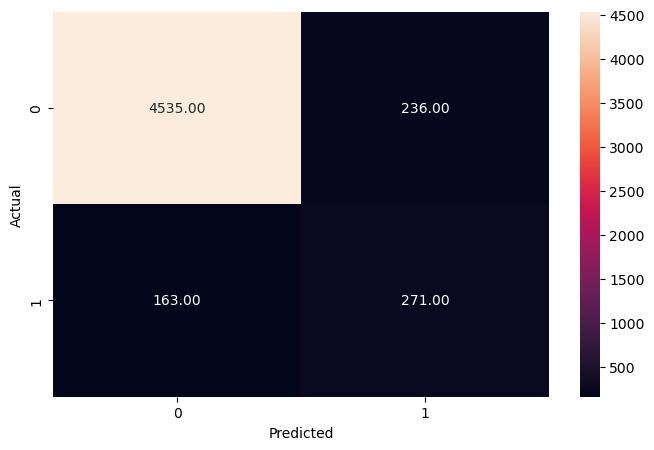

In [327]:
prd_test_rf = grid_search_rf.predict(X_test_stan)
metrics_score(Y_test, prd_test_rf)

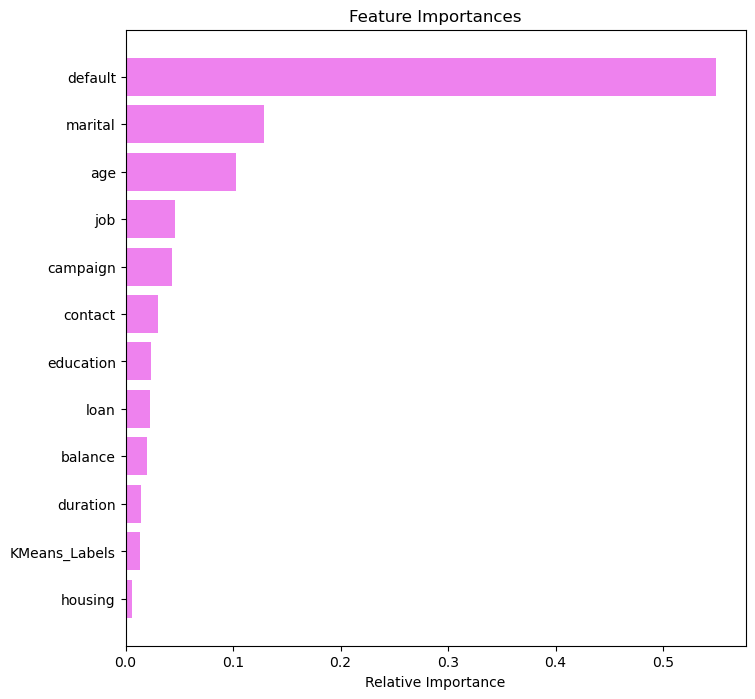

In [328]:
# importance of features in the tree building

feature_names = list(X.columns)
importances = grid_search_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Lets use our previous dataframe df6 and applying dummy variables the Z score outlier detection

In [329]:
df6

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38985,38,entrepreneur,single,tertiary,yes,-38,yes,no,cellular,18,may,119,4,no
39290,32,admin,divorced,secondary,yes,5,yes,yes,cellular,18,may,82,3,no
39347,24,services,single,secondary,yes,-1414,yes,yes,cellular,18,may,171,2,no
39397,59,management,divorced,tertiary,yes,0,no,no,cellular,22,may,239,1,no


In [330]:
df7 = pd.get_dummies(df6, drop_first=True)
df7

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
12657,27,35,4,255,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12658,54,466,4,297,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12659,43,105,4,668,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12660,31,19,4,65,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12661,27,126,4,436,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38985,38,-38,18,119,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39290,32,5,18,82,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39347,24,-1414,18,171,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39397,59,0,22,239,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [331]:
## Lets apply outlier detection using 3 Z scores
from scipy import stats

# calculate the z-score of each column
z = np.abs(stats.zscore(df7))

# drop the rows that have a z-score greater than 3 for only class '0'
df7 = df7[(z < 3).all(axis=1) | (df7['y_yes'] != 0)]
df7

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
12657,27,35,4,255,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12658,54,466,4,297,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12659,43,105,4,668,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12661,27,126,4,436,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12664,29,343,4,39,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33335,45,-443,20,691,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34768,39,3,6,488,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
35559,45,-106,7,553,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
37710,26,-930,14,786,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [332]:
df7['y_yes'].value_counts()

0    13214
1     2896
Name: y_yes, dtype: int64

In [333]:
Y = df7['y_yes']
X = df7.drop(['y_yes'], axis=1)
X

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
12657,27,35,4,255,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12658,54,466,4,297,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12659,43,105,4,668,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12661,27,126,4,436,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12664,29,343,4,39,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33335,45,-443,20,691,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34768,39,3,6,488,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35559,45,-106,7,553,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37710,26,-930,14,786,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [334]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=12)


In [335]:
ints = ['age', 'balance', 'duration', 'day']
ct = ColumnTransformer([
        ('somename', StandardScaler(), ints)
    ], remainder='passthrough')

X_train_stan = ct.fit_transform(X_train)
X_train_stan = pd.DataFrame(X_train_stan, columns=X.columns)

X_test_stan = ct.transform(X_test)
X_test_stan = pd.DataFrame(X_test_stan, columns=X.columns)


In [336]:
## random forest
#Random Forest

n_estimators = [75, 100, 125]
criterion=['entropy']
min_samples_split = [11, 12, 14]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train_stan, Y_train)


In [337]:
grid_search_rf.best_params_


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_split': 12,
 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1983
           1       0.76      0.85      0.81       434

    accuracy                           0.93      2417
   macro avg       0.87      0.90      0.88      2417
weighted avg       0.93      0.93      0.93      2417



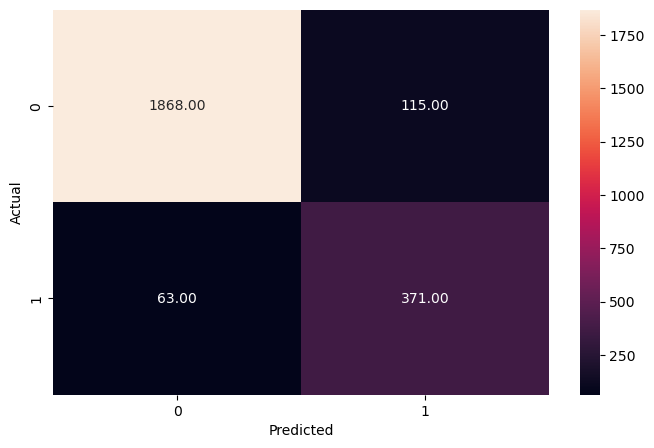

In [338]:
prd_test_rf = grid_search_rf.predict(X_test_stan)
metrics_score(Y_test, prd_test_rf)

In [339]:
##We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.


In [340]:
probabilities = grid_search_rf.predict_proba(X_test_stan)
probabilities_of_yes = probabilities[:, 1]
X_test['prob'] = probabilities_of_yes
X_test['y'] = Y_test
X_test

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,prob,y
33510,32,1995,20,121,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.014395,1
34626,39,224,5,106,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0.000000,0
27642,36,339,21,6,6,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0.020803,0
35310,39,-475,7,168,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.010000,0
22890,49,5244,25,60,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.009978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38483,44,-101,15,679,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.712172,1
37434,35,8040,13,173,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.047970,0
36331,34,213,11,47,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.000000,0
34405,55,233,5,813,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.745815,0


In [341]:
X_test_imp = X_test[X_test['prob'] > 0.5]
X_test_imp

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,prob,y
7348,30,873,29,792,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.882450,1
34122,35,71,30,510,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.743818,0
3840,24,656,16,894,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.756916,1
34101,47,2749,30,774,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.769725,1
17447,26,18,28,579,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0.676942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39921,57,3109,2,482,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.975657,1
20567,46,548,12,1181,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.994211,1
32161,36,11174,15,953,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.806003,1
38483,44,-101,15,679,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.712172,1


In [342]:
probabilities_train = grid_search_rf.predict_proba(X_train_stan)
probabilities_of_yes = probabilities_train[:, 1]
X_train['prob'] = probabilities_of_yes
X_train['y'] = Y_train

In [343]:
X_train_imp = X_train[X_train['prob'] > 0.5]
X_train_imp

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,prob,y
39123,26,154,18,1010,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.810675,0
31401,41,25,26,117,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.900147,1
12250,26,-122,23,670,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.958955,1
31447,73,2308,30,163,2,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0.989834,1
39010,34,243,18,507,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.809226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26524,43,3550,20,1154,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0.841802,1
15686,31,-537,21,1039,7,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0.882068,1
7324,33,127,29,1059,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.974509,1
21924,31,792,20,763,14,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.880380,1


In [344]:
X_train_imp = X_train_imp.reset_index(drop=True)
X_test_imp = X_test_imp.reset_index(drop=True)
Customers = pd.concat([X_train_imp, X_test_imp], axis=0)
Customers

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,prob,y
0,26,154,18,1010,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.810675,0
1,41,25,26,117,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.900147,1
2,26,-122,23,670,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.958955,1
3,73,2308,30,163,2,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0.989834,1
4,34,243,18,507,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.809226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,57,3109,2,482,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.975657,1
482,46,548,12,1181,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.994211,1
483,36,11174,15,953,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.806003,1
484,44,-101,15,679,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.712172,1


All the customers in Customers dataframe has more than 50% likelihood to subscribe in term deposit it will be good to contact them more

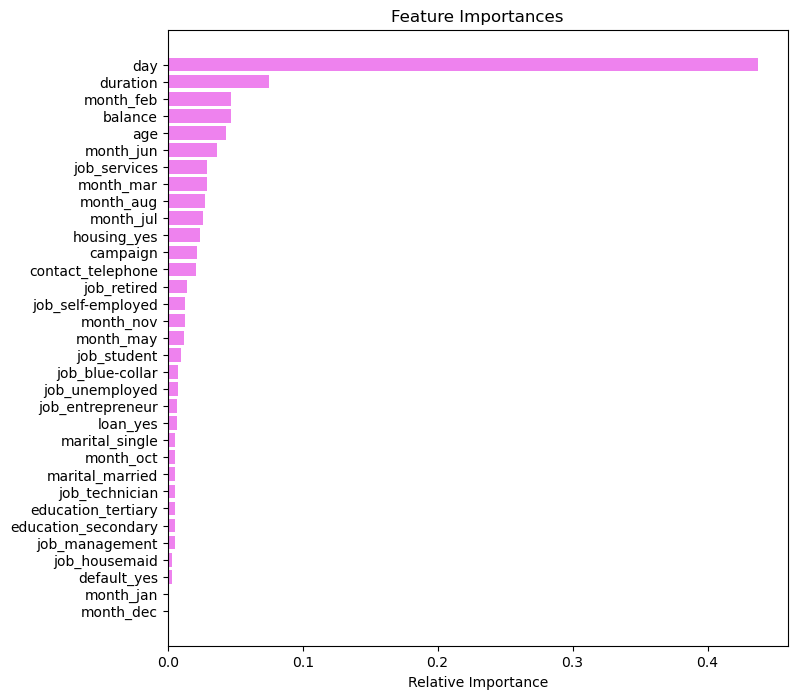

In [345]:
##What makes the customers buy? Tell us which feature we should be focusing more on.

feature_names = list(X.columns)
importances = grid_search_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

the most important features are day of contact and duration of calls